L'image étudiée est de taille (200, 311)


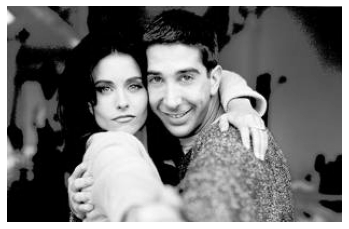

In [23]:
import matplotlib.pyplot as plt

import numpy as np

import time
import imutils
from skimage import color, transform
import cv2

positive_patches_shape = (66, 52)
Ni, Nj = positive_patches_shape

test_image = cv2.imread('img/ew-courtney-david.jpg') 

test_image = color.rgb2gray(test_image)

(H_MAX, W_MAX) = (500, 500)

if test_image.shape[0] > H_MAX or test_image.shape[1] > W_MAX:
    s = min(H_MAX / test_image.shape[0], W_MAX / test_image.shape[1])
    test_image = transform.rescale(test_image, s)

test_image = test_image[:200]
    
print("L'image étudiée est de taille {}".format(test_image.shape))

plt.imshow(test_image, cmap="gray")
plt.axis('off');

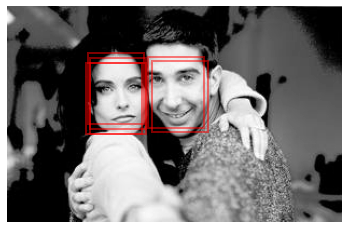

In [111]:
b = [
    (43, 75, 0.234),
    (52, 73, 0.832),
    (47, 76, 0.434),
    (52, 76, 1.234),
    (46, 130, 1.435),
    (50, 134, 0.835)
]

b = np.array(b)

fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

for (i, j, conf) in b:
    ax.add_patch(plt.Rectangle((j,i), Nj, Ni, edgecolor='red', alpha=0.5, lw=2, facecolor='none'))

In [113]:
def non_max_suppression(boxes, h=66, w=52, seuil=0.3):
    if len(boxes) == 0:
        return []
    
    l = []
    
    y1 = boxes[:,0]
    x1 = boxes[:,1]
    y2 = h + y1
    x2 = w + x1
    
    # On calcule les aires des boxes
    aires = (x2 - x1 + 1) * (y2 - y1 + 1)    # le + 1 pour éviter la division par zéro
    
    indexes = boxes[:,2]
    
    indexes = np.argsort(indexes)
    
    while len(indexes) > 0:
        lst = len(indexes) - 1
        i = indexes[lst]
        l.append(i)
        
        # On cherche les intersections entre la box courante et toutes les autres
        y1_inter = np.maximum(y1[i], y1[indexes[:lst]])
        x1_inter = np.maximum(x1[i], x1[indexes[:lst]])
        y2_inter = np.minimum(y2[i], y2[indexes[:lst]])
        x2_inter = np.minimum(x2[i], x2[indexes[:lst]])
        
        h_inter = np.maximum(0, y2_inter - y1_inter + 1)
        w_inter = np.maximum(0, x2_inter - x1_inter + 1)
        aires_inter = (w_inter * h_inter)
   
        overlap = aires_inter / aires[indexes[:lst]]
        
        indexes = np.delete(indexes, np.concatenate(([lst], np.where(overlap > seuil)[0])))
        
    return boxes[l]
        
        

[[ 43.     75.      0.234]
 [ 52.     73.      0.832]
 [ 47.     76.      0.434]
 [ 52.     76.      1.234]
 [ 46.    130.      1.435]
 [ 50.    134.      0.835]]
[[ 46.    130.      1.435]
 [ 52.     76.      1.234]]


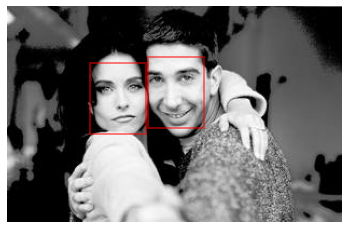

In [114]:
nms_b = non_max_suppression(b, seuil=0.3)

fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

print(b)
print(nms_b)

for (i, j, conf) in nms_b:
    ax.add_patch(plt.Rectangle((j,i), Nj, Ni, edgecolor='red', alpha=0.5, lw=2, facecolor='none'))